6.2 Exploring relationships

This script contains the following:

1. Importing Visualization Libraries and Data

2. Exploring Relationships

3. Correlations Scatterplots Pair Plots Categorical Plots

Importing Visualization Libraries and Data

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy

In [38]:
# Creating Path
path = r'/Users/mac/Documents/Achievement 6_Project'

In [39]:
#Importing Suidcide Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

2. Exploring Relationships

In [26]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [27]:
# Create a correlation matrix using pandas

df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.025240,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,0.305193,1.000000,0.303405
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,0.303405,1.000000


In [30]:
# Create a subset excluding the "country" and "year" columns

sub = df[['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']]

In [15]:
sub

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,21,312900,6.71,NaN,796
1,16,308000,5.19,NaN,796
2,14,289700,4.83,NaN,796
3,1,21800,4.59,NaN,796
4,9,274300,3.28,NaN,796
...,...,...,...,...,...
27815,107,3620833,2.96,0.675,2309
27816,9,348465,2.58,0.675,2309
27817,60,2762158,2.17,0.675,2309
27818,44,2631600,1.67,0.675,2309


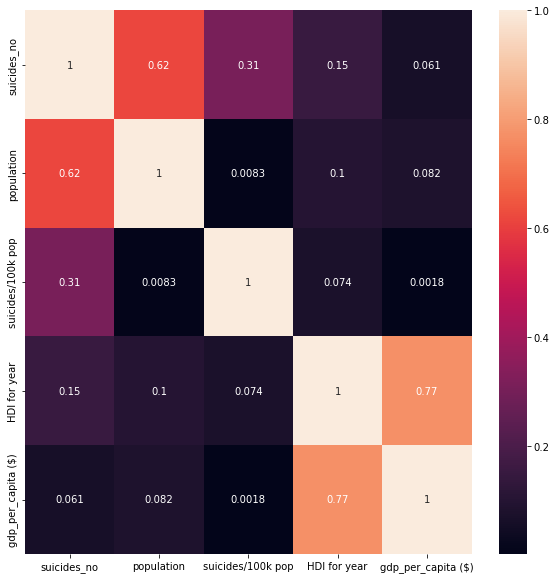

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There is a weak correlation (0.061) between suicides number and GDP per capita, weak correlation (0.15) between suicides number and Human development Index, theres a strong relationship between population and suicides number.

3. Correlations Scatterplots Pair Plots Categorical Plots

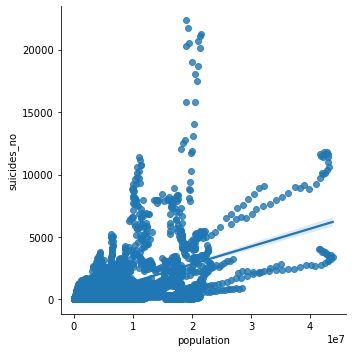

In [17]:
# Create a scatterplot for the "population" and "suicides_no" columns in seaborn

sns.lmplot(x = 'population', y = 'suicides_no', data = df)

The scater plot shows a positive relationship, there are many points around the line, while there are also few points far away from the line (possible outliers)

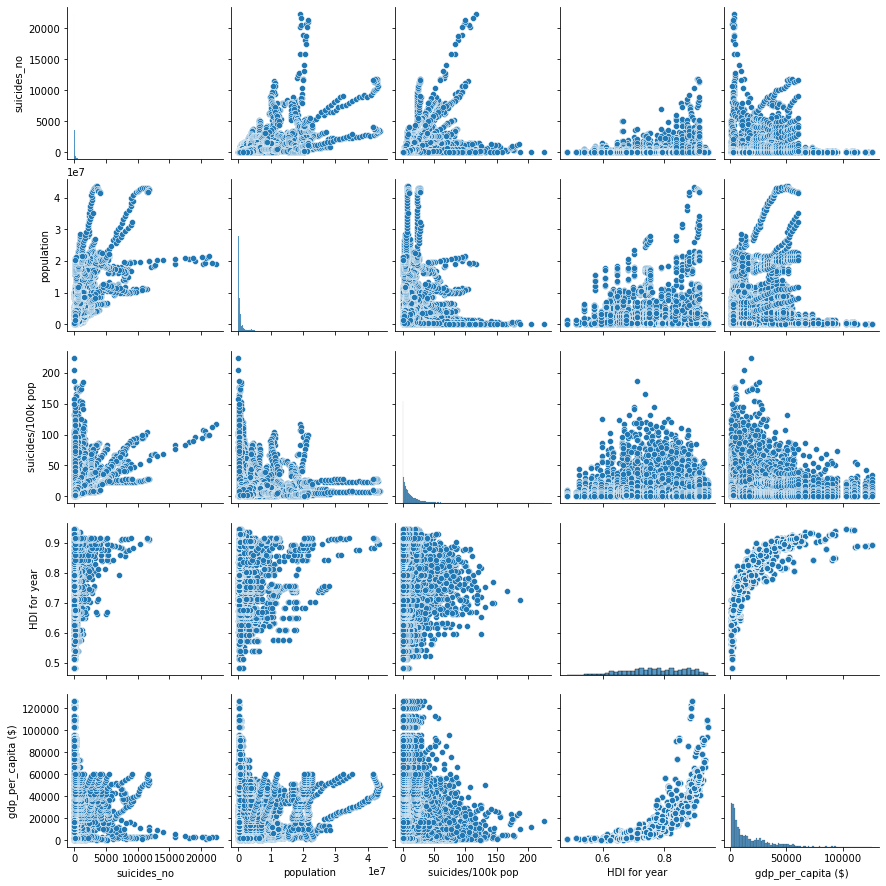

In [19]:
# Create a pair plot of entire dataset

g = sns.pairplot(sub)

There is need for further exploration of the relationship between population and suicide number, exploring other categories like sex, generation and age group and their possible interdpendence with suicide rate.

Categorical Plots

<AxesSubplot:xlabel='suicides_no', ylabel='Count'>

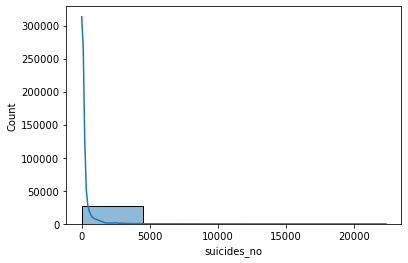

In [20]:
# Use a histogram to visualize the distribution of the dependent variable - suicides_no
sns.histplot(df['suicides_no'], bins = 5, kde = True)

In [53]:
#Creating a categorical variable that splits the "suicide_no" column into categories
df.loc[df['suicides_no'] < 50, 'Suicide Rate'] = 'Low Rate'

In [54]:
df.loc[(df['suicides_no'] >= 50) & (df['suicides_no'] < 500), 'Suicide Rate'] = 'Middle Rate'

In [55]:
df.loc[df['suicides_no'] >= 500, 'Suicide Rate'] = 'High Rate'

In [56]:
df['Suicide Rate'].value_counts(dropna = False)

Low Rate       16696
Middle Rate     8358
High Rate       2766
Name: Suicide Rate, dtype: int64

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

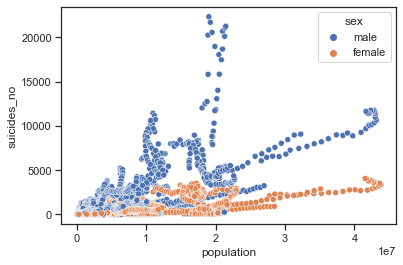

In [66]:
# Create a categorical plot in seaborn using the suicides_no and other variables

sns.set(style="ticks")
sns.scatterplot(x = 'population', y = 'suicides_no', hue = 'sex', data = df)

From this categorical plot, there is a general lower suicide number among females as the population increases while there is a higher suicide number among males as the population increases.

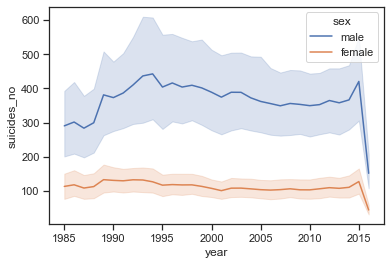

In [41]:
# Creating a line chart of yearly suicide number by sex
line = sns.lineplot(data = df, hue = 'sex', x = 'year',y = 'suicides_no')

The line also shows the disproportionately higher number of suicides among the male population.

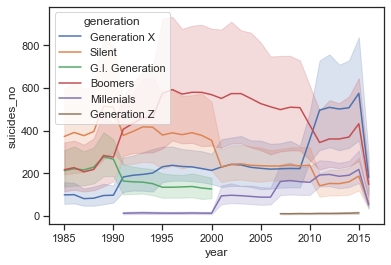

In [42]:
# Creating a line chart of yearly suicide number by generation
line = sns.lineplot(data = df, hue = 'generation', x = 'year',y = 'suicides_no')

7. New Question - Why is suicide disproportionately more among the male population? 

8. Developing Hypothesis: Suicide rate will go up if the population of men goes up

Creating more cateorical plots with more variables

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides_no'>

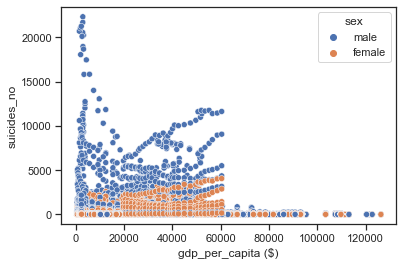

In [63]:
sns.scatterplot(x = 'gdp_per_capita ($)', y = 'suicides_no', hue = 'sex', data = df)

This plot also shows that lower number of suicides among females is equivalent to increase in GDP per capita. 

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

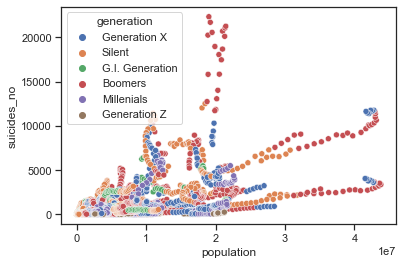

In [64]:
sns.scatterplot(x = 'population', y = 'suicides_no', hue = 'generation', data = df)

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

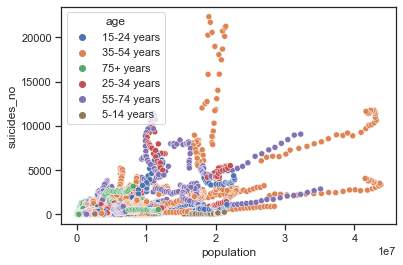

In [65]:
sns.scatterplot(x = 'population', y = 'suicides_no', hue = 'age', data = df)